In [31]:
%pylab inline
import scipy as sp
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cosh']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


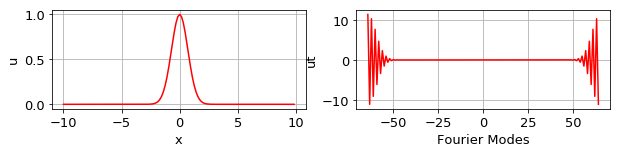

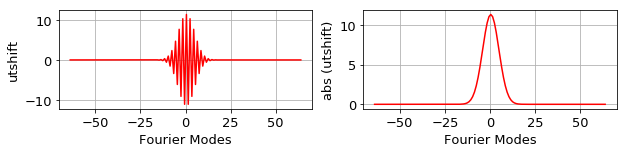

In [47]:
L=20
n=128
x2= np.linspace(-L/2,L/2,n+1)
x=np.array(x2[0:n])
n_m=np.linspace(-n/2,n/2,n)
u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

figure(figsize=(10,4))
pylab.subplot(2,2,1)
pylab.plot(x,u,'-r')
pylab.xlabel("x")
pylab.ylabel("u")
pylab.grid()

pylab.subplot(2,2,2)
pylab.plot(n_m,ut,'-r')
pylab.xlabel("Fourier Modes")
pylab.ylabel("ut")
pylab.grid()
pylab.show()

figure(figsize=(10,4))

pylab.subplot(2,2,1)
pylab.plot(n_m,utshift,'-r')
pylab.xlabel("Fourier Modes")
pylab.ylabel("utshift")
pylab.grid()

pylab.subplot(2,2,2)
pylab.plot(n_m,abs(utshift), '-r')
pylab.xlabel("Fourier Modes")
pylab.ylabel ("abs (utshift)")
pylab.grid()
pylab.show()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


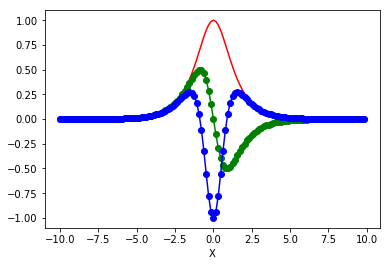

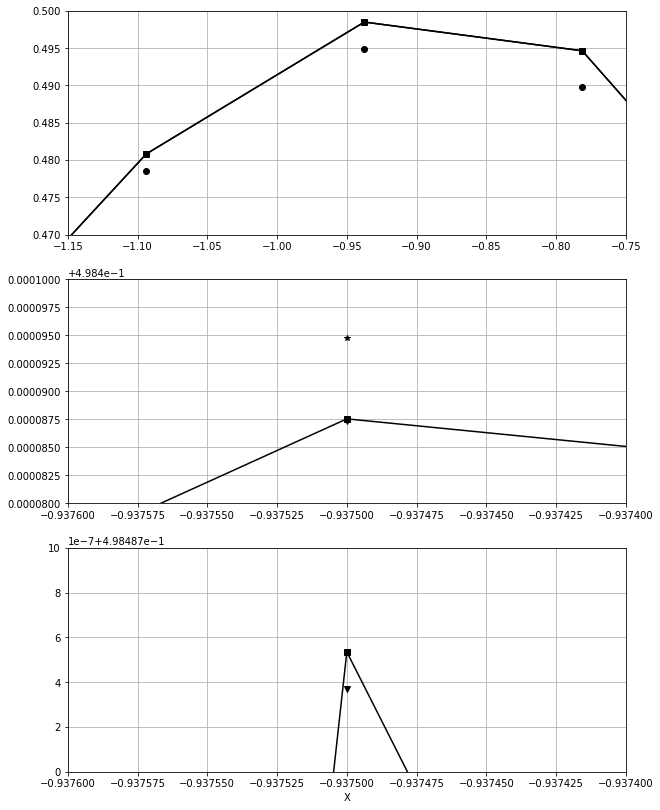

In [16]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=np.array(x2[0:n])
n_m=np.linspace(-n/2,n/2,n)
dx=x[1]-x[0]
cosh=np.cosh(x)
sech=1/cosh
u=sech
ut=np.fft.fft(u)
pos=np.linspace(0,n/2-1,n/2)
neg=np.linspace(-n/2,-1,n/2)
k_1=(2*np.pi/L)*pos
k_2=(2*np.pi/L)*neg
k=np.concatenate((k_1,k_2))

ut1=1j*k*ut
ut2=-k*k*ut
u1=np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real
u1exact=-sech*np.tanh(x)
u2exact=sech-2*sech**3

ux=[]
ux_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux.append(ux_1)
for j in range(1,n-1):
    ux_j=(u[j+1]-u[j-1])/(2*dx)
    ux.append(ux_j)
ux_f=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux.append(ux_f)

ux2=[]
ux2_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2.append(ux2_1)
ux2_2=(-3*u[1]+4*u[2]-u[3])/(2*dx)
ux2.append(ux2_2)
for j in range(2,n-2):
    ux2_j=((-u[j+2])+(8*u[j+1])-(8*u[j-1])+u[j-2])/(12*dx)
    ux2.append(ux2_j)
ux2_n1=((3*u[-2])-(4*u[-3])+(u[-4]))/(2*dx)
ux2.append(ux2_n1)
ux2_n=((3*u[-1])-(4*u[-2])+(u[-3]))/(2*dx)
ux2.append(ux2_n)

pylab.plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u2exact,'bo')
pylab.xlabel("X")
pylab.figure(figsize=(10,14))
pylab.subplot(3,1,1)
pylab.plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-1.15,-0.75])
pylab.ylim([0.47,0.5])
pylab.grid()

pylab.subplot(3,1,2)
pylab.plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-0.9376,-0.9374])
pylab.ylim([0.49848,0.49850])
pylab.grid()
pylab.subplot(3,1,3)
pylab.plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
pylab.xlim([-0.9376,-0.9374])
pylab.ylim([0.498487,0.498488])
pylab.xlabel("X")
pylab.grid()

pylab.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


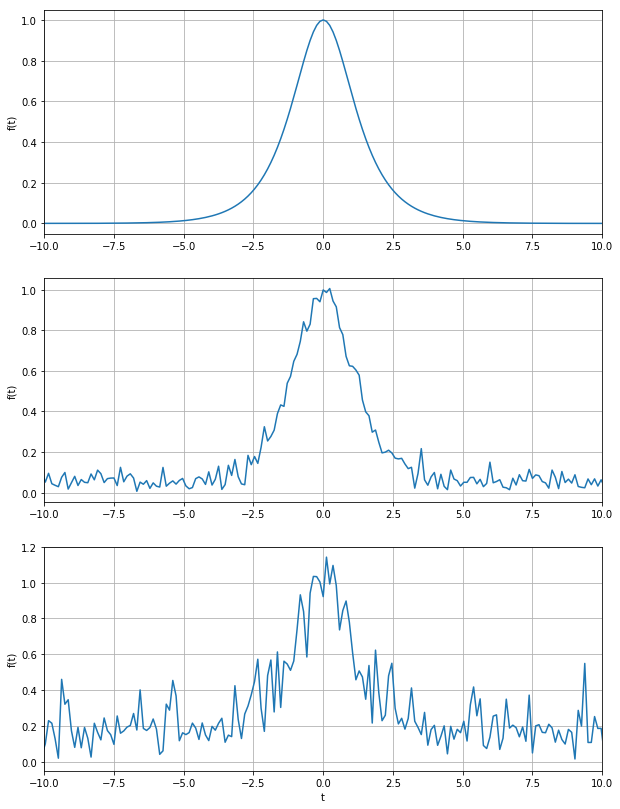

In [17]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=np.array(t2[0:n])
cosh=np.cosh(t)
sech=1/cosh
pos=np.linspace(0,n/(2-1),n/2)
neg=np.linspace(-n/2,-1,n/2)
k_1=(2*np.pi/L)*pos
k_2=(2*np.pi/L)*neg
k=np.concatenate((k_1,k_2))
u=sech
noise=1
noise2=5
ut=np.fft.fft(u)
utn=ut+noise*(np.random.randn(1,n))+1j*((np.random.randn(1,n)))
utn2=ut+noise2*(np.random.randn(1,n))+1j*((np.random.randn(1,n)))
un=np.fft.ifft(utn)
un2=np.fft.ifft(utn2)

pylab.figure(figsize=(10,14))
pylab.subplot(3,1,1)
pylab.ylabel ("f(t)")
pylab.plot(t,u)
pylab.xlim([-10,10])
pylab.grid()

pylab.subplot(3,1,2)
pylab.ylabel ("f(t)")
pylab.plot(t,abs(un)[0])
pylab.xlim([-10,10])
pylab.grid()

pylab.subplot(3,1,3)
pylab.xlabel("t")
pylab.ylabel ("f(t)")
pylab.plot(t,abs(un2)[0])
pylab.xlim([-10,10])
pylab.grid()

pylab.show()

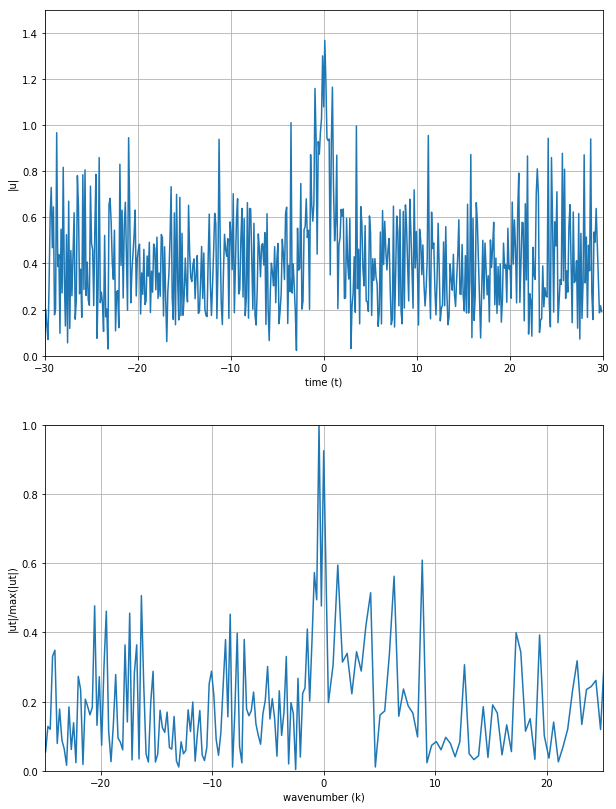

In [22]:
noise=10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.randn(n))+1j*((np.random.randn(n)))
un=np.fft.ifft(unt)
shiftk=np.fft.fftshift(k)
shiftunt=np.fft.fftshift(unt)

pylab.figure(figsize=(10,14))
pylab.subplot(2,1,1)
pylab.plot(t,abs(un))
pylab.xlim([-30,30])
pylab.ylim([0,1.5])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')
pylab.grid()

pylab.subplot(2,1,2)
pylab.plot(shiftk,abs(shiftunt)/max(abs(shiftunt)))
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')
pylab.grid()
pylab.show()

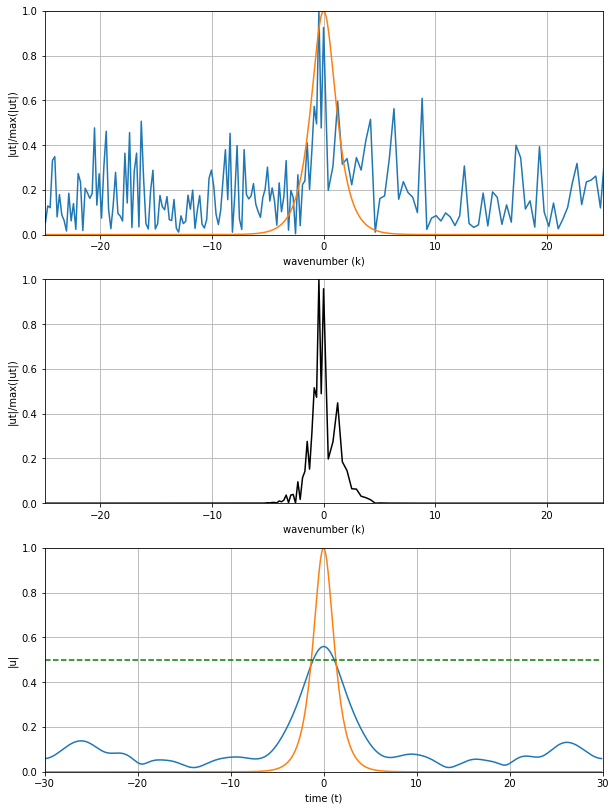

In [23]:
filtro=np.exp(-0.2*k**2)
unft=filtro*unt
unf=np.fft.ifft(unft)

pylab.figure(figsize=(10,14))
pylab.subplot(3,1,1)
pylab.plot(shiftk,abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))))
pylab.plot(t,u)
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')
pylab.grid()

pylab.subplot(3,1,2)
pylab.plot(shiftk,abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))),'k')
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')
pylab.grid()

pylab.subplot(3,1,3)
pylab.plot(t,abs(unf))
pylab.plot(t,abs(u))
pylab.plot(t,np.linspace(0.5,0.5,512),'--g')
pylab.xlim([-30,30])
pylab.ylim([0,1])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')
pylab.grid()
pylab.show()

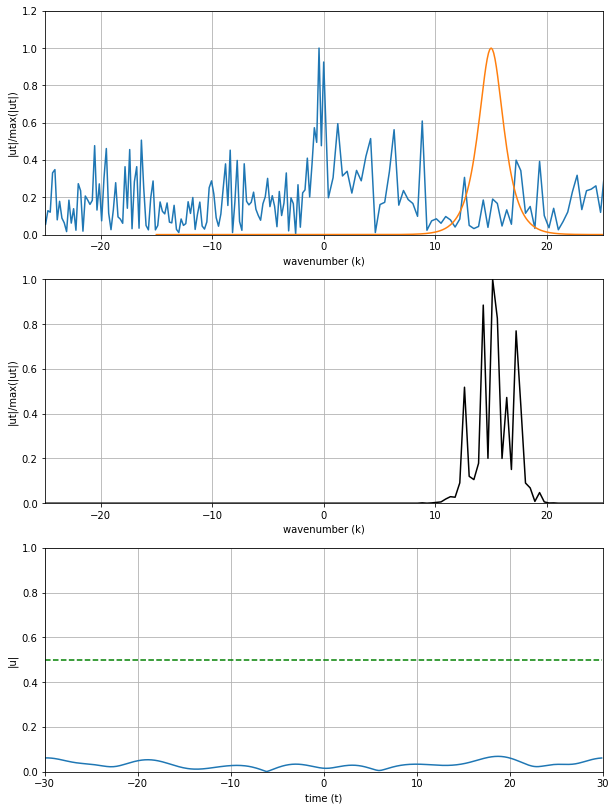

In [25]:
filtro=np.exp(-0.2*(k-15)**2)
unft=filtro*unt
unf=np.fft.ifft(unft)

pylab.figure(figsize=(10,14))
pylab.subplot(3,1,1)
pylab.plot(shiftk,abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))))
pylab.plot(t+15,u)
pylab.xlim([-25,25])
pylab.ylim([0,1.2])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')
pylab.grid()

pylab.subplot(3,1,2)
pylab.plot(shiftk,abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))),'k')
pylab.xlim([-25,25])
pylab.ylim([0,1])
pylab.xlabel('wavenumber (k)')
pylab.ylabel('|ut|/max(|ut|)')
pylab.grid()

pylab.subplot(3,1,3)
pylab.plot(t,abs(unf))
pylab.plot(t,np.linspace(0.5,0.5,512),'--g')
pylab.xlim([-30,30])
pylab.ylim([0,1])
pylab.xlabel('time (t)')
pylab.ylabel('|u|')
pylab.grid()
pylab.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


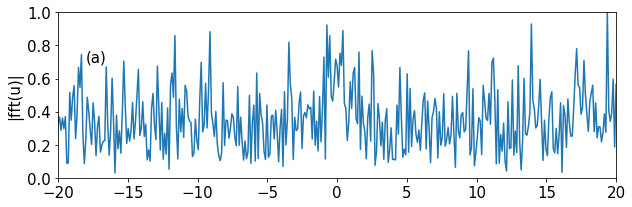

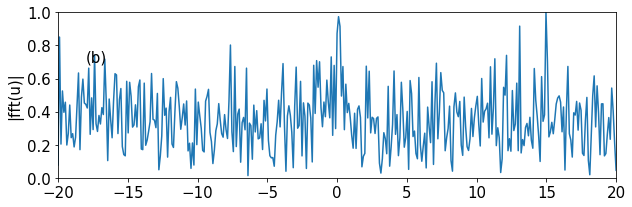

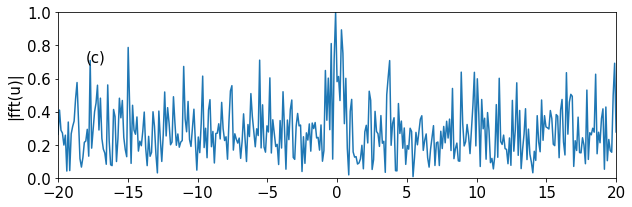

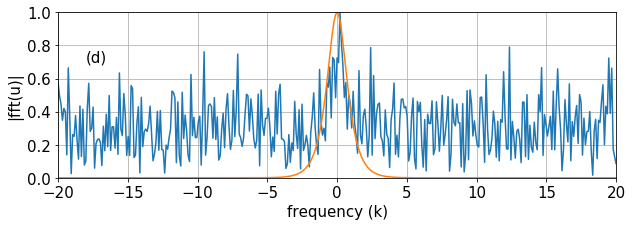

In [26]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=np.array(t2[0:n])
k_1=(2*np.pi/(2*L))*np.linspace(0,n/2-1,n/2)
k_2=(2*np.pi/(2*L))*np.linspace(-n/2,-1,n/2)
k=np.concatenate((k_1,k_2))
ks=np.fft.fftshift(k)
noise=10
labels=np.array(['(a)','(b)','(c)','(d)'])
realize=np.array([1, 2, 5, 100])
utn=[]
lon=[]
for jj in range(0,len(realize)):
    un=[]
    dat=[]
    cosh=np.cosh(t)
    sech=1/cosh
    u=sech
    ave=np.zeros(n)
    ut=np.fft.fft(u)
    utn_j=ut+noise*(np.random.randn(n)+1j*np.random.randn(n))
    while len(utn) < realize[jj]:
        utn.append(utn_j)
    for i in range(0,realize[jj]):
        ave=ave+utn[i]
        un_1=np.fft.ifft(utn[i])
        un.append(un_1)
        dat_1=abs(np.fft.fftshift(utn[i]))/max(abs(utn[i]))
        dat.append(dat_1)
        ave=abs(np.fft.fftshift(ave))/realize[jj]
    pylab.figure(figsize=(10,14))
    matplotlib.rcParams.update({'font.size': 15})
    pylab.subplot(4,1,jj+1)
    pylab.plot(ks,ave/(max(ave)))
    pylab.axis([-20, 20, 0, 1])
    pylab.matplotlib.pyplot.annotate(labels[jj], xy=(-18, 0.7),fontsize=15)
    pylab.ylabel('|fft(u)|', fontsize=15)
pylab.plot(ks,abs(np.fft.fftshift(ut))/max(abs(ut)))
matplotlib.rcParams.update({'font.size': 15})
pylab.xlabel('frequency (k)')
pylab.grid()
pylab.show()

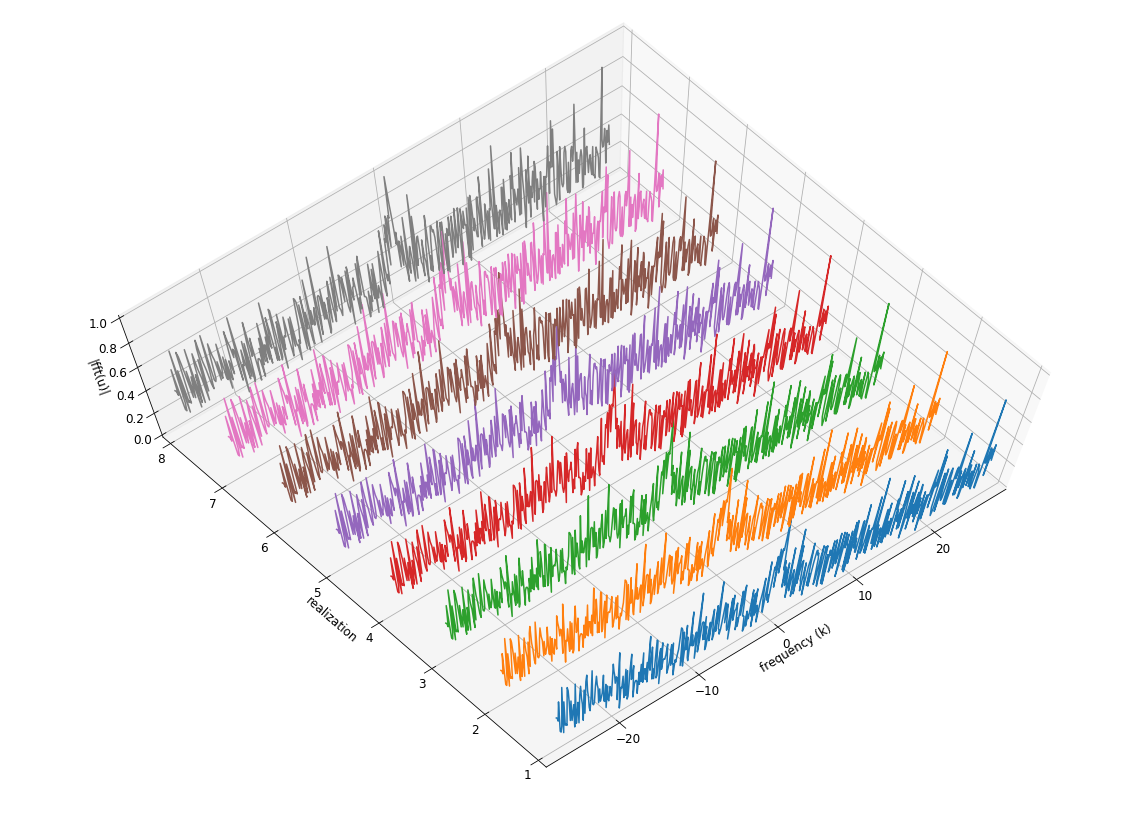

In [39]:
fig = pylab.figure(figsize=(20,15))
matplotlib.rcParams['font.size'] = 12
ax = fig.gca(projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-28,28)
ax.set_ylim(1,8)
ax.set_zlim(0,1)
for a in range(0,8):
    X=ks
    Y=np.zeros(n)+(a+1)
    Z=dat[i]

    ax.plot(X,Y,Z)
ax.view_init(75,230)

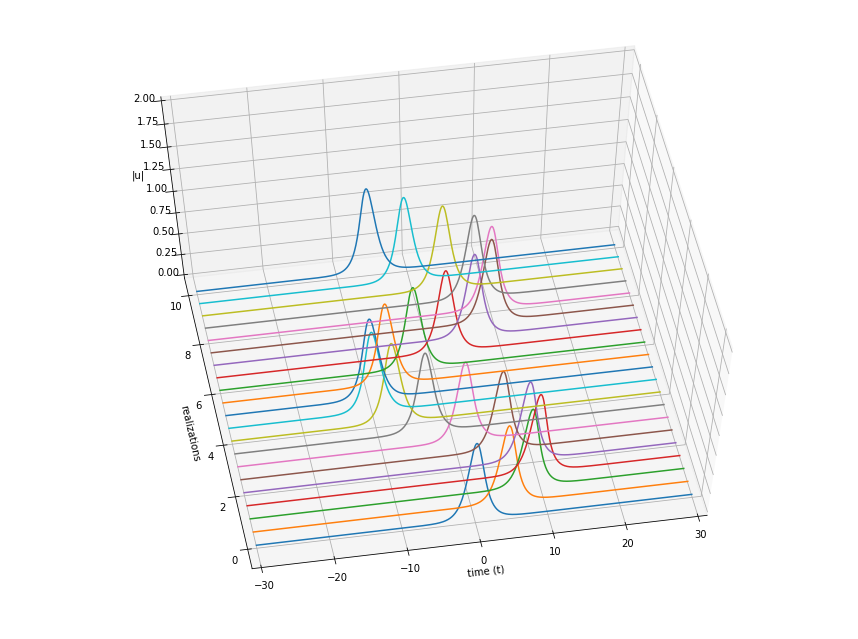

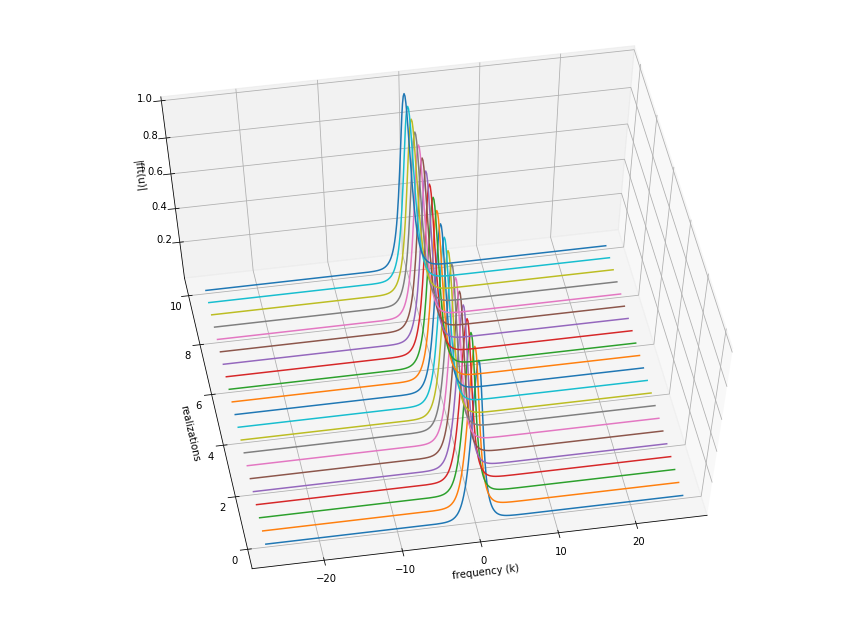

In [35]:
fig_1 = pylab.figure(figsize=(15,25))
matplotlib.rcParams['font.size'] = 10
ax_1 = fig_1.add_subplot(2, 1, 1, projection='3d')
slice=np.linspace(0,10,21)
[T,S]=np.meshgrid(t,slice)
[K,S]=np.meshgrid(k,slice)
cosh=np.cosh((T-10*np.sin(S)))
sech=1/cosh
U=sech*np.exp(i*0*T)
ax_1.set_xlabel('time (t)')
ax_1.set_ylabel('realizations')
ax_1.set_zlabel('|u|')
ax_1.set_xlim(-30,30)
ax_1.set_zlim(0,2)
for b in range(0,len(slice)):
    X=T[b]
    Y=S[b]
    Z=U[b]
    ax_1.plot(X,Y,Z)
ax_1.view_init(60,260)
Ut=[]
Kp=[]
Utp=[]
Utn=[]
Utnp=[]
Un=[]
for j in range (0,len(slice)):
    Ut_1=np.fft.fft(U[j])
    Ut.append(Ut_1)
    Kp_1=np.fft.fftshift(K[j])
    Kp.append(Kp_1)
    Utp_1=np.fft.fftshift(Ut[j])
    Utp.append(Utp_1)
    Utn_1=Ut[j]+noise*(np.random.randn(n)+1j*np.random.randn(n))
    Utn.append(Utn_1)
    Utnp_1=np.fft.fftshift(Utn[j])/max(abs(Utn[j]))
    Utnp.append(Utnp_1)
    Un_1=np.fft.ifft(Utn[j])
    Un.append(Un_1)
fig_2 = pylab.figure(figsize=(15,25))
matplotlib.rcParams['font.size'] = 10
ax_2 = fig_2.add_subplot(2, 1, 2, projection='3d')
ax_2.set_xlabel('frequency (k)')
ax_2.set_ylabel('realizations')
ax_2.set_zlabel('|fft(u)|')
ax_2.set_xlim(-28,28)
for b in range(0,len(slice)):
    X=Kp[b]
    Y=S[b]
    Z=abs(Utp[b])/max(abs(Utp[0]))

    ax_2.plot(X,Y,Z)
ax_2.view_init(60,260)

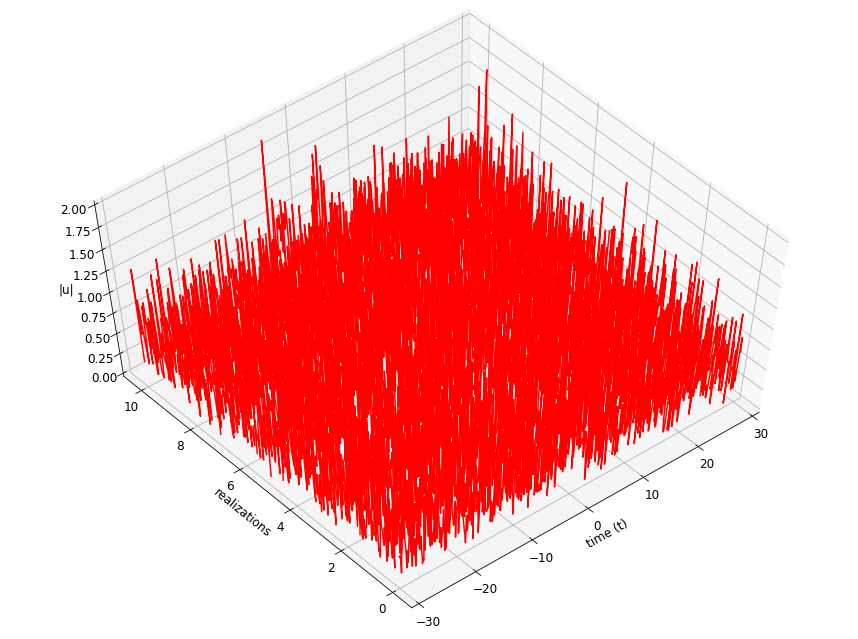

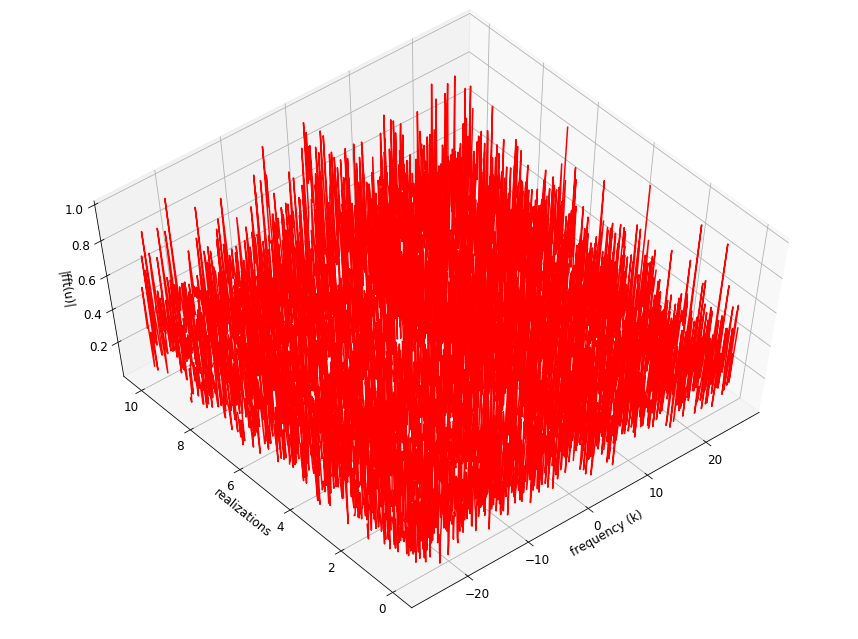

In [43]:
fig_3 = pylab.figure(figsize=(15,25))
matplotlib.rcParams['font.size'] = 12
ax_3 = fig_3.add_subplot(2, 1, 1, projection='3d')
ax_3.set_xlabel('time (t)')
ax_3.set_ylabel('realizations')
ax_3.set_zlabel('|u|')
ax_3.set_xlim(-30,30)
ax_3.set_zlim(0,2)
for b in range(0,len(slice)):
    X=T[b]
    Y=S[b]
    Z=abs(Un[b])

    ax_3.plot(X,Y,Z,color='r')

ax_3.view_init(60,230)

fig_4 = pylab.figure(figsize=(15,25))
matplotlib.rcParams['font.size'] = 12
ax_4 = fig_4.add_subplot(2, 1, 2, projection='3d')
ax_4.set_xlabel('frequency (k)')
ax_4.set_ylabel('realizations')
ax_4.set_zlabel('|fft(u)|')
ax_4.set_xlim(-28,28)
for b in range(0,len(slice)):
    X=Kp[b]
    Y=S[b]
    Z=abs(Utnp[b])

    ax_4.plot(X,Y,Z,color='r')
ax_4.view_init(60,230)

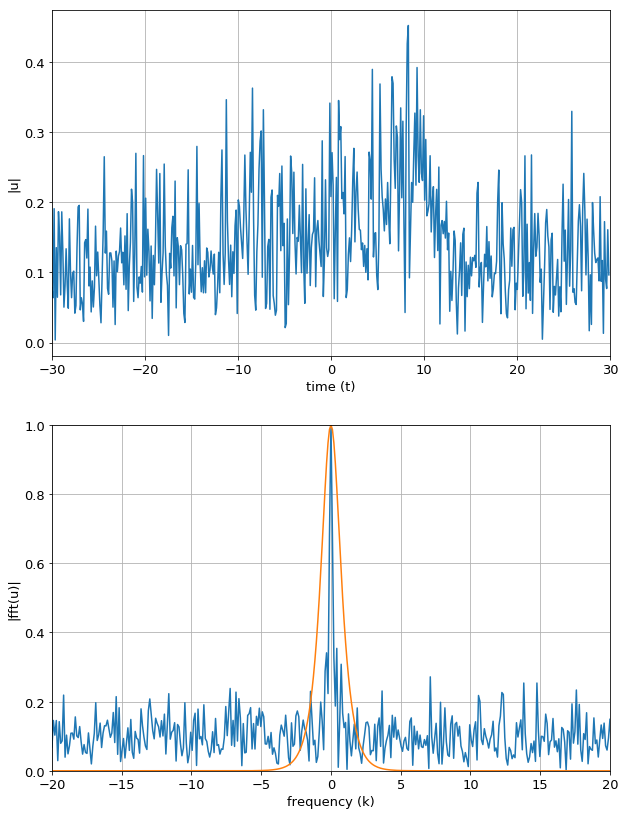

In [44]:
Uave=np.zeros(n) 
Utave=np.zeros(n)
for j in range(0,len(slice)):
    
    Uave=Uave+Un[j]
    Utave=Utave+Utn[j]
    
Uave=Uave/len(slice)
Utave=np.fft.fftshift(Utave)/len(slice)
plt.figure(figsize=(10,14))
matplotlib.rcParams.update({'font.size': 13})
pylab.subplot(2,1,1)
pylab.plot(t,abs(Uave))
pylab.xlabel('time (t)')
pylab.ylabel('|u|')
pylab.xlim(-30,30)
pylab.grid()

pylab.subplot(2,1,2)
pylab.plot(ks,abs(Utave)/max(abs(Utave)))
pylab.plot(ks,abs(np.fft.fftshift(Ut[0])/max(abs(Ut[0]))),[2])
pylab.axis([-20, 20, 0, 1])
pylab.xlabel('frequency (k)')
pylab.ylabel('|fft(u)|')
pylab.grid()
pylab.show()